In [4]:
# !pip install keras
# !pip install tensorflow
# !pip install keras
# !pip install theano


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=198c6910f1675ca80e4ec2e1b9e772f5a2eb1219aa13abc58bb0b1fa41a315d8
  Stored in directory: /root/.cache/pip/wheels/12/d8/36/e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Successfully built theano


In [5]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import time #helper libraries

**WHY USE LSTM? Is it good to predict re-occuring data?I didn't get great results from the 1st notebook and decided to try to predict stock price movements by giving in stock price movements instead of just simple stock prices as input**


**In this notebook I normalized only the closing prices and then broke it into train and test datasets. I just kept a simple lookback window to give all similar data same movement(movement is just giving the data points the same kind of normalization) and put them in price points as input**



In [6]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
link = 'https://drive.google.com/open?id=1y394o-wiPqYPaWzVYTPRr8xpE_aM9621'

In [10]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1y394o-wiPqYPaWzVYTPRr8xpE_aM9621


In [11]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AMZN.csv')  
df3 = pd.read_csv('AMZN.csv')
# Dataset is now stored in a Pandas Dataframe

In [12]:
#VANILLA LSTM NETWORK CREATED:

In [17]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import time #helper libraries

In [18]:
df3 = df3.dropna(axis = "columns")

In [19]:
df3.head()

,Date,Open,High,Low,Adj Close,Volume,Close
0,1/4/2010,136.250000,136.610001,133.139999,133.899994,7599900,133.899994
1,1/5/2010,133.429993,135.479996,131.809998,134.690002,8851900,134.690002
2,1/6/2010,134.600006,134.729996,131.649994,132.250000,7178800,132.250000
3,1/7/2010,132.009995,132.320007,128.800003,130.000000,11030200,130.000000
4,1/8/2010,130.559998,133.679993,129.029999,133.520004,9830500,133.520004


In [16]:
#working with a conventional OHCLV dataset

In [20]:
import numpy as np

In [21]:
#FOCUS ON PREDICTING CLOSING PRICES AS BEFORE

In [22]:
df_close = df3['Close']

In [23]:
df_close.shape

(2265,)

In [24]:
#Reshaping it
df_close = df_close.values.reshape(2265,1)

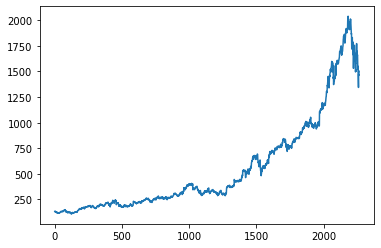

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Ploting it
plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)


In [26]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

1812 453


**Normalize the values such that prices are reduced to normalized values and I can predict stock movement instead of actual prices**

In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [28]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [29]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
model = Sequential()

model.add(LSTM(
    units=50,
    input_shape=(None, 1),
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    units=100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print('compilation time:', time.time() - start)


compilation time: 0.01305532455444336


In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=80,
    validation_split=0.05)


**is it overtrained? lets run again with 40 epochs**

In [36]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=40,
    validation_split=0.05)


Epoch 1/40
14/14 [==============================] - 0s 24ms/step - loss: 1.5225e-04 - mae: 0.0087 - val_loss: 8.2943e-05 - val_mae: 0.0081
Epoch 2/40
14/14 [==============================] - 0s 17ms/step - loss: 1.3491e-04 - mae: 0.0082 - val_loss: 2.7869e-05 - val_mae: 0.0039
Epoch 3/40
14/14 [==============================] - 0s 18ms/step - loss: 1.3255e-04 - mae: 0.0080 - val_loss: 3.2631e-05 - val_mae: 0.0044
Epoch 4/40
14/14 [==============================] - 0s 11ms/step - loss: 1.4001e-04 - mae: 0.0085 - val_loss: 2.7138e-05 - val_mae: 0.0037
Epoch 5/40
14/14 [==============================] - 0s 11ms/step - loss: 1.3019e-04 - mae: 0.0078 - val_loss: 2.6850e-05 - val_mae: 0.0037
Epoch 6/40
14/14 [==============================] - 0s 13ms/step - loss: 1.4300e-04 - mae: 0.0080 - val_loss: 4.6738e-05 - val_mae: 0.0057
Epoch 7/40
14/14 [==============================] - 0s 20ms/step - loss: 1.3820e-04 - mae: 0.0084 - val_loss: 4.9923e-05 - val_mae: 0.0059
Epoch 8/40
14/14 [=========

**Final Predictions**

15/15 [==============================] - 1s 2ms/step


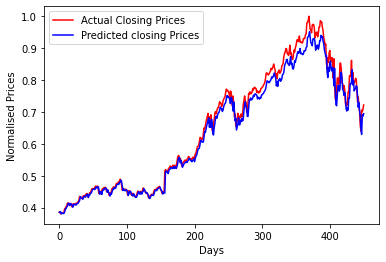

In [37]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

**So LSTM  works great to predict Closing Prices when we normalize the prices and predict the stock Price movement.**

In [38]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

15/15 [==============================] - 0s 3ms/step - loss: 1.5807e-05 - mae: 0.0027


**Seems like using LSTM to predict stock price movement gives much better prediction resullts!!**

**Will work more on this in the next notebook..**